In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import os 
import scipy.io
from scipy import stats
from __future__ import print_function
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd

## Load Data from .mat files

In [2]:
test=scipy.io.loadmat('adni_connectome_aparc_length.mat')
aparcl=np.array(test['connectome_aparc0x2Baseg_length'])
print(aparcl.shape)

test=scipy.io.loadmat('adni_connectome_aparc_count.mat')
aparcc=np.array(test['connectome_aparc0x2Baseg_count'])
print(aparcc.shape)

test=scipy.io.loadmat('adni_connectome_aparc2009_length.mat')
aparc2l=np.array(test['connectome_aparc0x2Ea2009s0x2Baseg_length'])
print(aparc2l.shape)

test=scipy.io.loadmat('adni_connectome_aparc2009_count.mat')
aparc2c=np.array(test['connectome_aparc0x2Ea2009s0x2Baseg_count'])
print(aparc2c.shape)



(84, 84, 179)
(84, 84, 179)
(164, 164, 179)
(164, 164, 179)


## Zeropad smaller data, reorganize shape

In [3]:
zeromatal=np.zeros([164,164,179])
zeromatac=np.zeros([164,164,179])

zeromatal[40:124,40:124,:]=aparcl
zeromatac[40:124,40:124,:]=aparcc

aparcl=zeromatal
aparcc=zeromatac

X=np.zeros([164,164,179,4])
X[:,:,:,0]=aparcl
X[:,:,:,1]=aparcc
X[:,:,:,2]=aparc2l
X[:,:,:,3]=aparc2c

X=X.transpose([2,0,1,3])
print(X.shape)

(179, 164, 164, 4)


## remove subjs without connectome data

In [4]:
data=pd.read_csv('adni_data_1_mor.csv',header=0)
data=np.array(data)
datasubjid=data[:,0]
print(datasubjid.shape)
matsubjid=pd.read_csv('adni_connectome_subjectlist.csv',header=0)
matsubjid=np.array(matsubjid)
print(matsubjid.shape)

filtindex=np.isin(datasubjid,matsubjid)
filtindex=filtindex.ravel()
labels=data[:,13]
predict_data=data[:,12]
y=labels[filtindex]
final_diag=predict_data[filtindex]


(201,)
(179, 1)


## load labels, index data for all 6 types

In [5]:
# smi=1 , mci=2, ad=3

test=scipy.io.loadmat('ADNI_morph_100.mat')
morphdata=np.array(test['M1_new'])

mciloc=np.asarray(np.where(y==2))
mciloc=np.ndarray.transpose(mciloc)

ylabel=np.zeros([60,])
X_predict=np.zeros([60,164,164,4])
Xvar_predict=np.zeros([60,100])

for i in range(60):
    ylabel[i,]=final_diag[mciloc[i],]
    X_predict[i,:,:,:]=X[mciloc[i],:,:,:]
    Xvar_predict[i,:]=morphdata[mciloc[i],:]



print(ylabel.shape)
print(X_predict.shape)
print(Xvar_predict.shape)


(60,)
(60, 164, 164, 4)
(60, 100)


## Run CNN with 5fold Cross validation for conversion prediction

TRAIN: (47,) TEST: (13,)
(47, 100)
(13, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 38.46153846153846%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:35 accuracy: 46.15384615384615%
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:50 accuracy: 61.53846153846154%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 


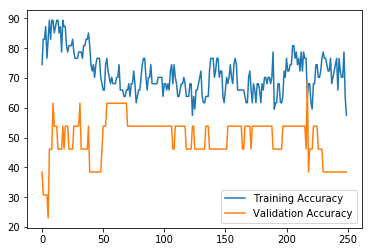

TRAIN: (47,) TEST: (13,)
(47, 100)
(13, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 69.23076923076923%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
epoch 75 
epoch 76 
epoch 

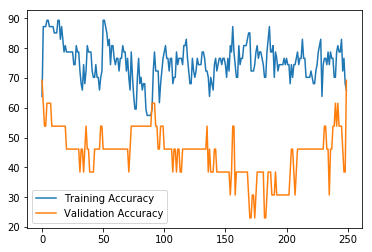

TRAIN: (48,) TEST: (12,)
(48, 100)
(12, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 66.66666666666666%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
epoch 75 
epoch 76 
epoch 

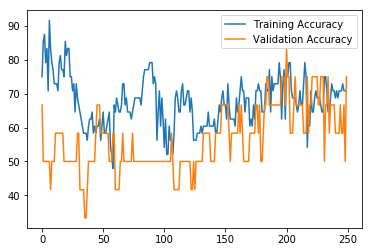

TRAIN: (49,) TEST: (11,)
(49, 100)
(11, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 54.54545454545455%
epoch 2 
Best validation accuracy! iteration:10 accuracy: 72.72727272727272%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70

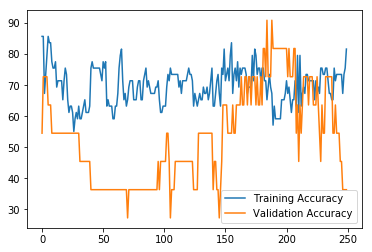

TRAIN: (49,) TEST: (11,)
(49, 100)
(11, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 54.54545454545455%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:25 accuracy: 63.63636363636363%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70

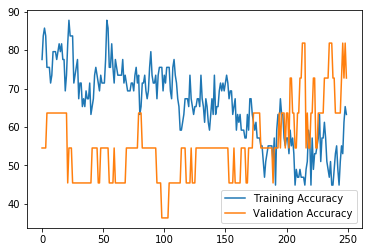

TRAIN: (47,) TEST: (13,)
(47, 100)
(13, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 53.84615384615385%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:20 accuracy: 61.53846153846154%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70

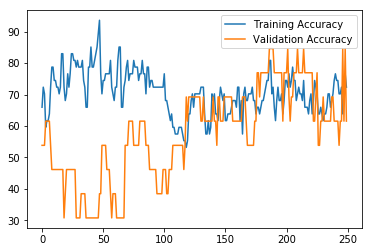

TRAIN: (47,) TEST: (13,)
(47, 100)
(13, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 46.15384615384615%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
epoch 75 
epoch 76 
epoch 

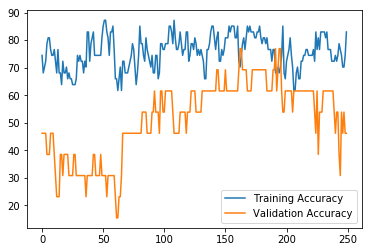

TRAIN: (48,) TEST: (12,)
(48, 100)
(12, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 25.0%
epoch 2 
Best validation accuracy! iteration:10 accuracy: 33.33333333333333%
epoch 3 
Best validation accuracy! iteration:15 accuracy: 58.333333333333336%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
ep

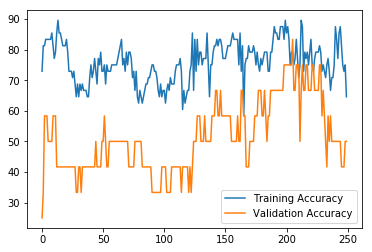

TRAIN: (49,) TEST: (11,)
(49, 100)
(11, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 45.45454545454545%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
Best validation accuracy! iteration:270 accuracy: 54.54545454545455%
epoch 55 
epoch 56 
epoch 57 
epoch 58 
Best validation accuracy! iteration:290 accuracy: 63.63636363636363%
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63

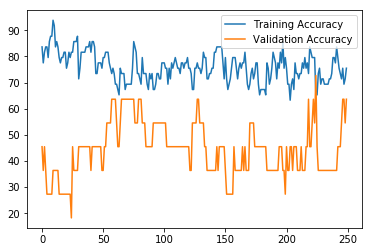

TRAIN: (49,) TEST: (11,)
(49, 100)
(11, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 45.45454545454545%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:25 accuracy: 54.54545454545455%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:70 accuracy: 63.63636363636363%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
Best validation accuracy! iteration:170 accuracy: 72.72727272727272%
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
e

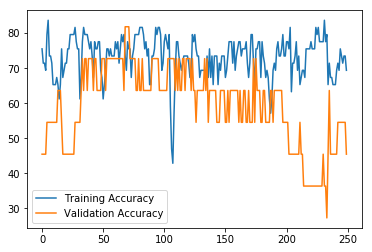

TRAIN: (47,) TEST: (13,)
(47, 100)
(13, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 53.84615384615385%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
Best validation accuracy! iteration:335 accuracy: 61.53846153846154%
epoch 68 
epoch 69 
epoch 7

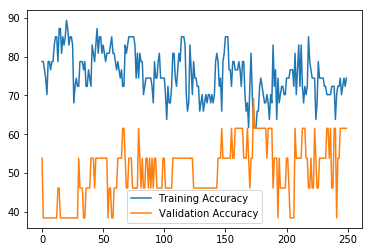

TRAIN: (47,) TEST: (13,)
(47, 100)
(13, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 38.46153846153846%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:25 accuracy: 46.15384615384615%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70

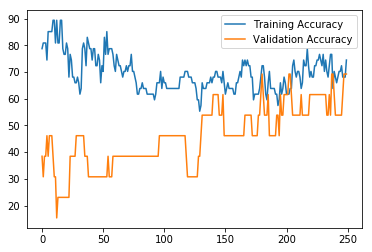

TRAIN: (48,) TEST: (12,)
(48, 100)
(12, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 41.666666666666664%
epoch 2 
Best validation accuracy! iteration:10 accuracy: 50.0%
epoch 3 
Best validation accuracy! iteration:15 accuracy: 58.333333333333336%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
e

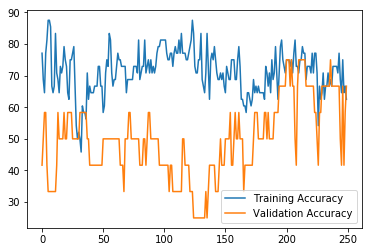

TRAIN: (49,) TEST: (11,)
(49, 100)
(11, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 72.72727272727272%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
epoch 75 
epoch 76 
epoch 

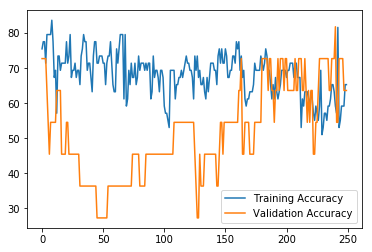

TRAIN: (49,) TEST: (11,)
(49, 100)
(11, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 36.36363636363637%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:70 accuracy: 45.45454545454545%
epoch 15 
epoch 16 
Best validation accuracy! iteration:80 accuracy: 54.54545454545455%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
Best validation accuracy! iteration:105 accuracy: 72.72727272727272%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
e

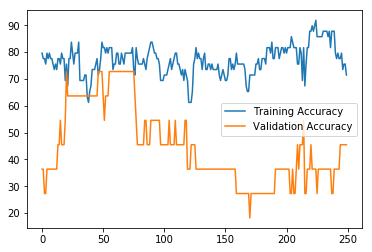

TRAIN: (47,) TEST: (13,)
(47, 100)
(13, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 38.46153846153846%
epoch 2 
Best validation accuracy! iteration:10 accuracy: 46.15384615384615%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:30 accuracy: 53.84615384615385%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
Best validation accuracy! iteration:230 accuracy: 61.53846153846154%
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
e

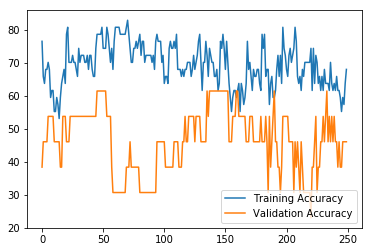

TRAIN: (47,) TEST: (13,)
(47, 100)
(13, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 46.15384615384615%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
Best validation accuracy! iteration:165 accuracy: 53.84615384615385%
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 7

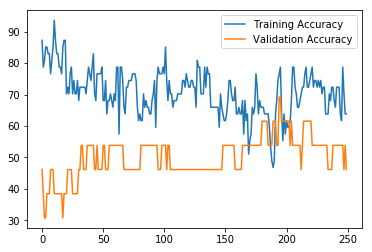

TRAIN: (48,) TEST: (12,)
(48, 100)
(12, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 33.33333333333333%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
Best validation accuracy! iteration:150 accuracy: 41.666666666666664%
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 

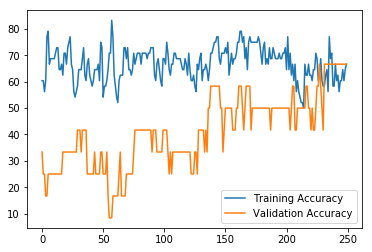

TRAIN: (49,) TEST: (11,)
(49, 100)
(11, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 63.63636363636363%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:95 accuracy: 72.72727272727272%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70

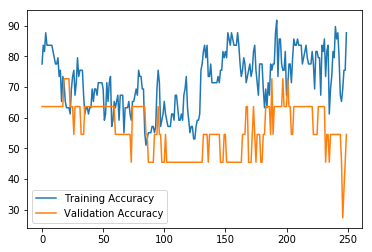

TRAIN: (49,) TEST: (11,)
(49, 100)
(11, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 45.45454545454545%
epoch 2 
Best validation accuracy! iteration:10 accuracy: 72.72727272727272%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70

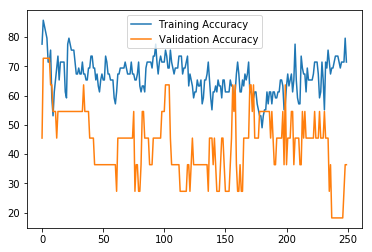

TRAIN: (47,) TEST: (13,)
(47, 100)
(13, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 23.07692307692308%
epoch 2 
Best validation accuracy! iteration:10 accuracy: 38.46153846153846%
epoch 3 
epoch 4 
Best validation accuracy! iteration:20 accuracy: 46.15384615384615%
epoch 5 
Best validation accuracy! iteration:25 accuracy: 53.84615384615385%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
Best validation accuracy! iteration:180 accuracy: 61.53846153846154%
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epo

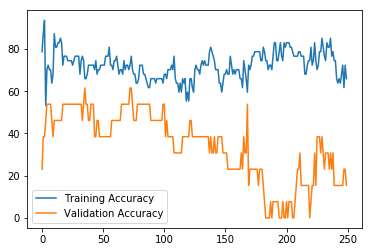

TRAIN: (47,) TEST: (13,)
(47, 100)
(13, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 30.769230769230774%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:20 accuracy: 38.46153846153846%
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:35 accuracy: 46.15384615384615%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
Best validation accuracy! iteration:210 accuracy: 53.84615384615385%
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
Best valid

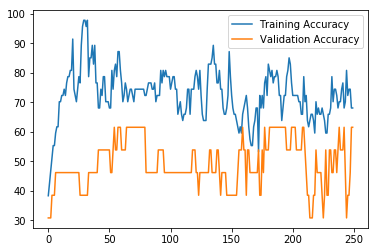

TRAIN: (48,) TEST: (12,)
(48, 100)
(12, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 25.0%
epoch 2 
Best validation accuracy! iteration:10 accuracy: 41.666666666666664%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
Best validation accuracy! iteration:315 accuracy: 50.0%
epoch 64 
epoch 65 
epoc

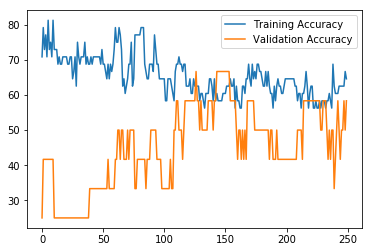

TRAIN: (49,) TEST: (11,)
(49, 100)
(11, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 36.36363636363637%
epoch 2 
Best validation accuracy! iteration:10 accuracy: 54.54545454545455%
epoch 3 
Best validation accuracy! iteration:15 accuracy: 72.72727272727272%
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:30 accuracy: 81.81818181818181%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
ep

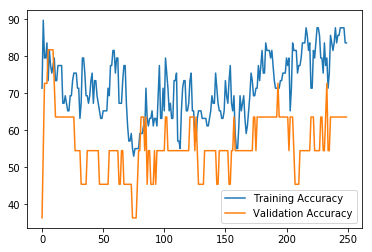

TRAIN: (49,) TEST: (11,)
(49, 100)
(11, 100)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 5
epoch 1 
Best validation accuracy! iteration:5 accuracy: 45.45454545454545%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
epoch 75 
epoch 76 
epoch 

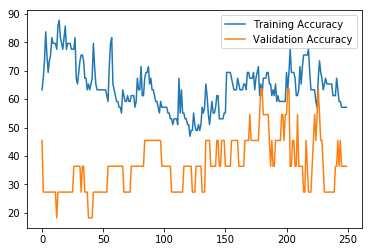

Conversion Prediction average accuracy is:  73.6013986013986
Conversion Prediction standard deviation is:  8.059606997693184


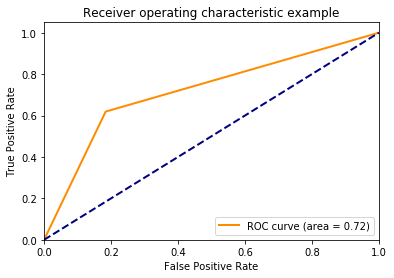

In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_with_addvariables import cnnm_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(X_predict,ylabel):
    print("TRAIN:",train_index.shape,"TEST:",test_index.shape)
    # should augment data post split, think of incorporating the data augmention here
    X_train,X_test=X_predict[train_index],X_predict[test_index]
    y_train,y_test=ylabel[train_index],ylabel[test_index]
    X_trainvar,X_valvar=Xvar_predict[train_index],Xvar_predict[test_index]
    print(X_trainvar.shape)
    print(X_valvar.shape)
    
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]
    X_trainvar=X_trainvar[mask_train,:]
    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=cnnm_training(X_train,y_train,X_trainvar,X_test,y_test,X_valvar,fc_units=[4000,2000,2], 
                 conv_featmap=[6,10,16],l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=250,batch_size=9,imglen=164,addedvar_num=100)

    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(store_acc)

print('Conversion Prediction average accuracy is: ',mean_acc)
print('Conversion Prediction standard deviation is: ',mean_std)
    
fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/ADNI_predict_convert_CNNM.jpg')
plt.show()

In [25]:
print(np.array(store_acc))

[69.23076923 69.23076923 83.33333333 90.90909091 81.81818182 84.61538462
 76.92307692 83.33333333 72.72727273 81.81818182 69.23076923 69.23076923
 75.         81.81818182 72.72727273 61.53846154 69.23076923 66.66666667
 72.72727273 72.72727273 61.53846154 61.53846154 66.66666667 81.81818182
 63.63636364]
